In [1]:
%matplotlib inline
import seaborn as sns
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from tsmom_model import *
from datetime import datetime
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


F	January
G	February
H	March
J	April
K	May
M	June
N	July
Q	August
U	September
V	October
X	November
Z	December

In [2]:
list_of_markets=['C','JM','I','M','BB','J','CS','PP','L','V','JD','P','A','Y','B','FB']
list_of_months = ['F','G','H','J','K','M','N','Q','U','V','X','Z']

# Soybeans

In [3]:
ddf={}
mini_list = list(list_of_months)
for y in range(2018,2012,-1):
    for m in mini_list:
        try:
            ddf[m + str(y)[2:]]=quandl.get('DCE/M' + m + str(y),authtoken=token)[['Close','Volume','Turnover','Open Interest']]
        except:
            mini_list.remove(m)
            print 'Missing '+m + ' '+ str(y)

Missing G 2018
Missing J 2018
Missing M 2018
Missing Q 2018
Missing V 2018
Missing Z 2018


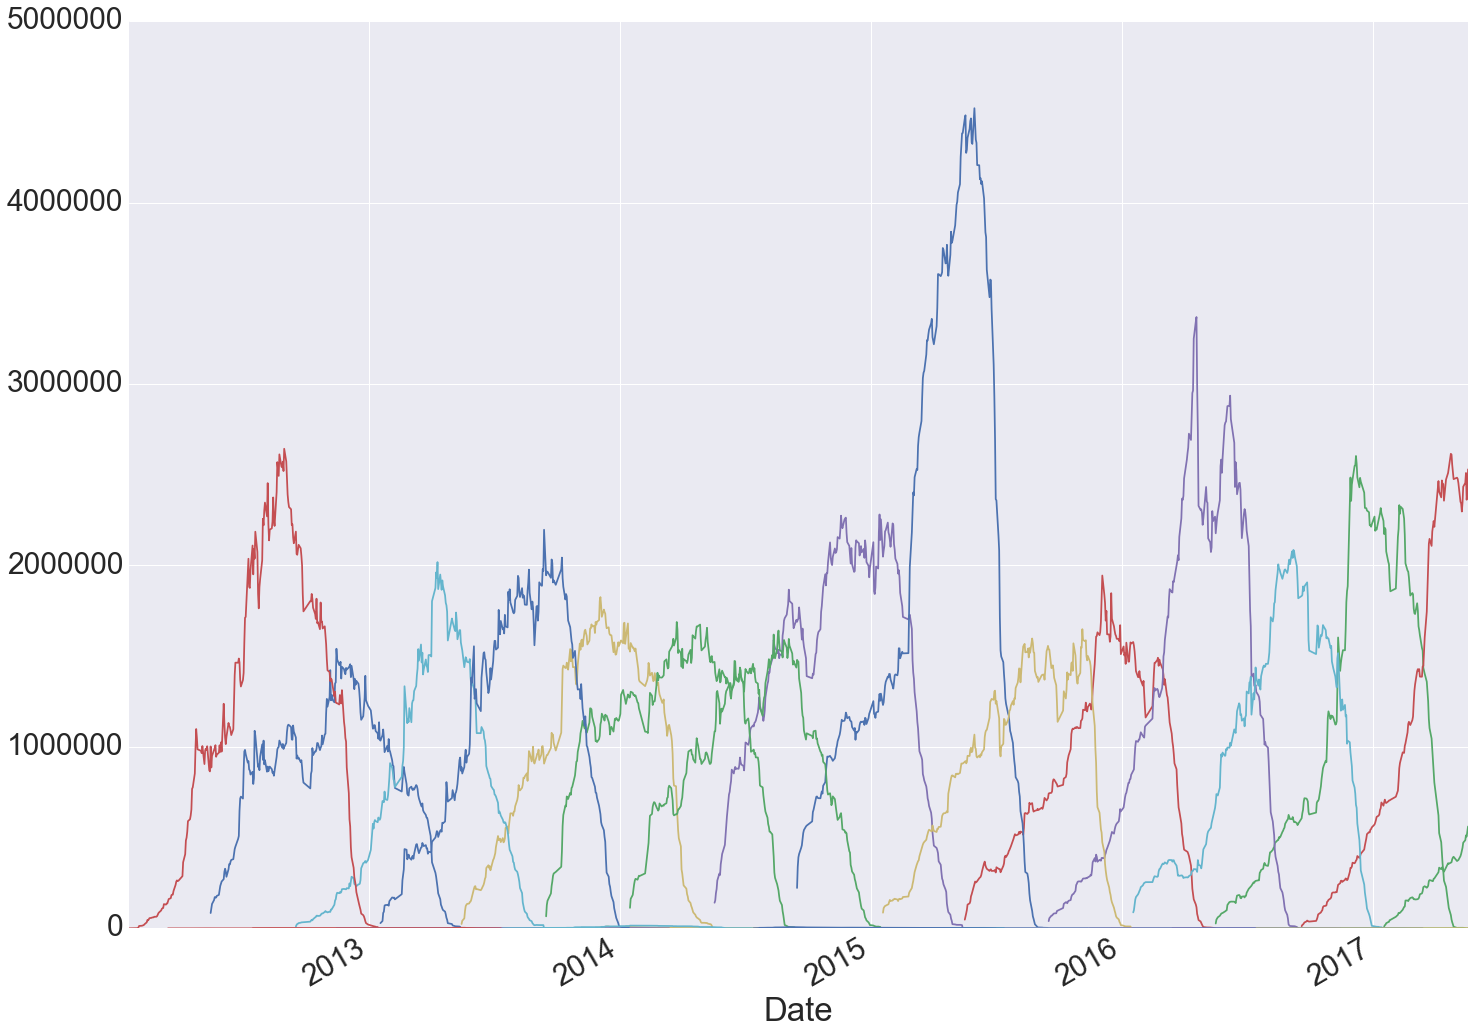

In [4]:
f, ax = plt.subplots()
for k in ddf.keys():
    if ddf[k].Volume.max() > 1:
        ddf[k]['Open Interest'].plot(ax=ax)

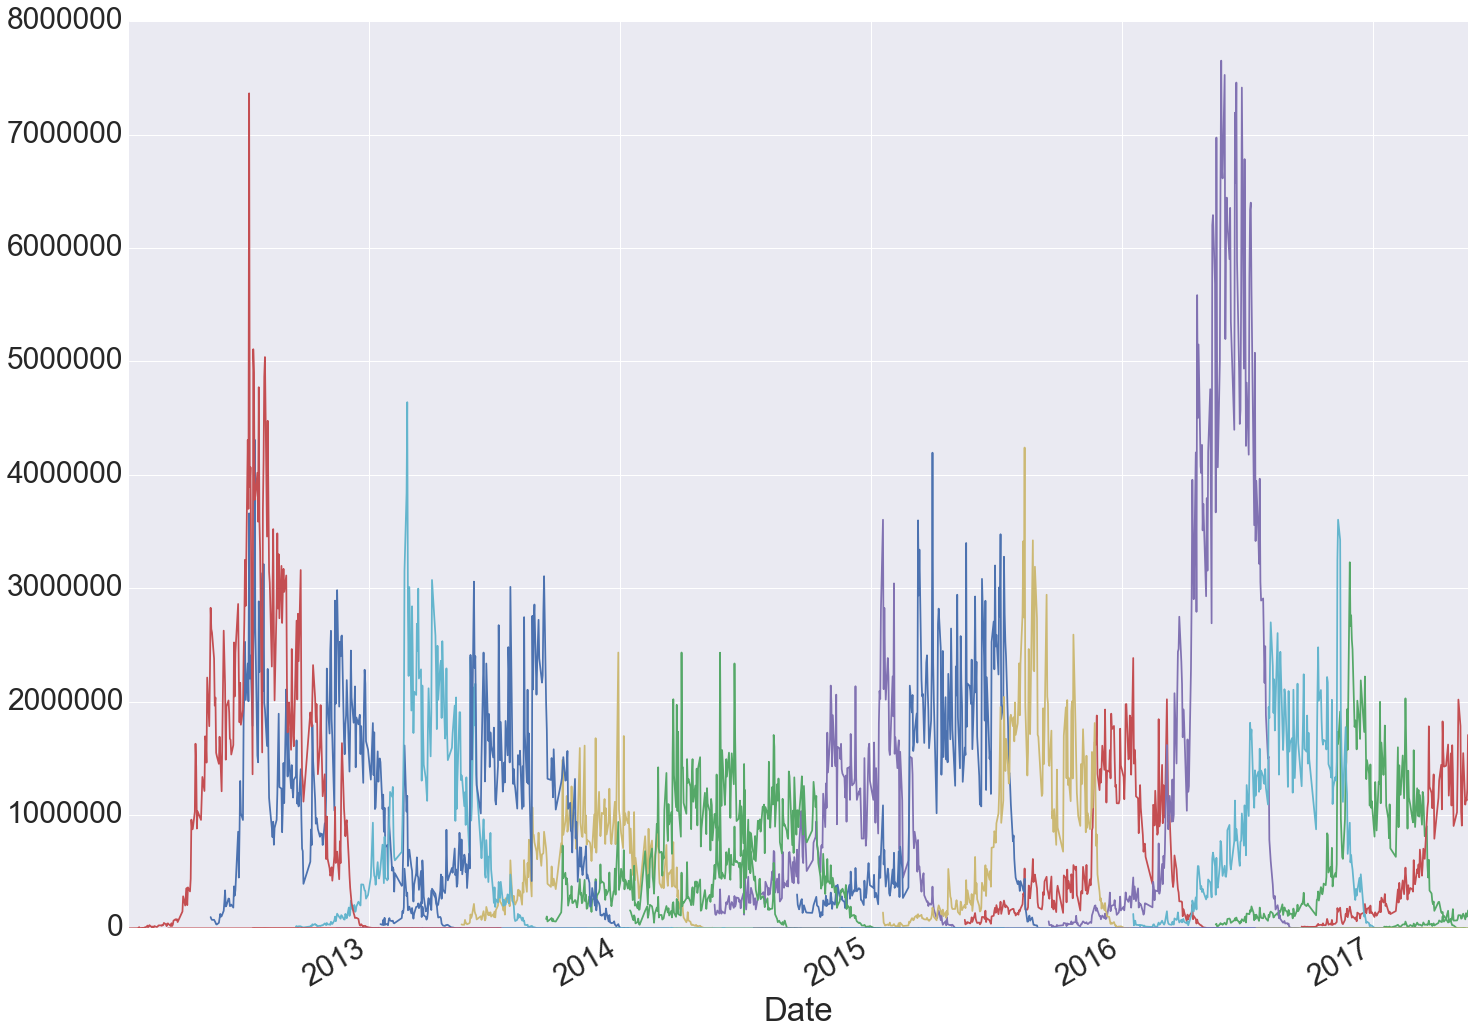

In [5]:
f, ax = plt.subplots()
for k in ddf.keys():
    if ddf[k].Volume.max() > 1:
        ddf[k]['Volume'].plot(ax=ax)

In [6]:
ix = pd.DatetimeIndex(start=datetime(2000, 1, 1), end=datetime(2018, 12, 31), freq='D')
price=pd.DataFrame(index=ix)
for k in ddf.keys():
    price[k]=ddf[k].Close
price=price.dropna(how='all')

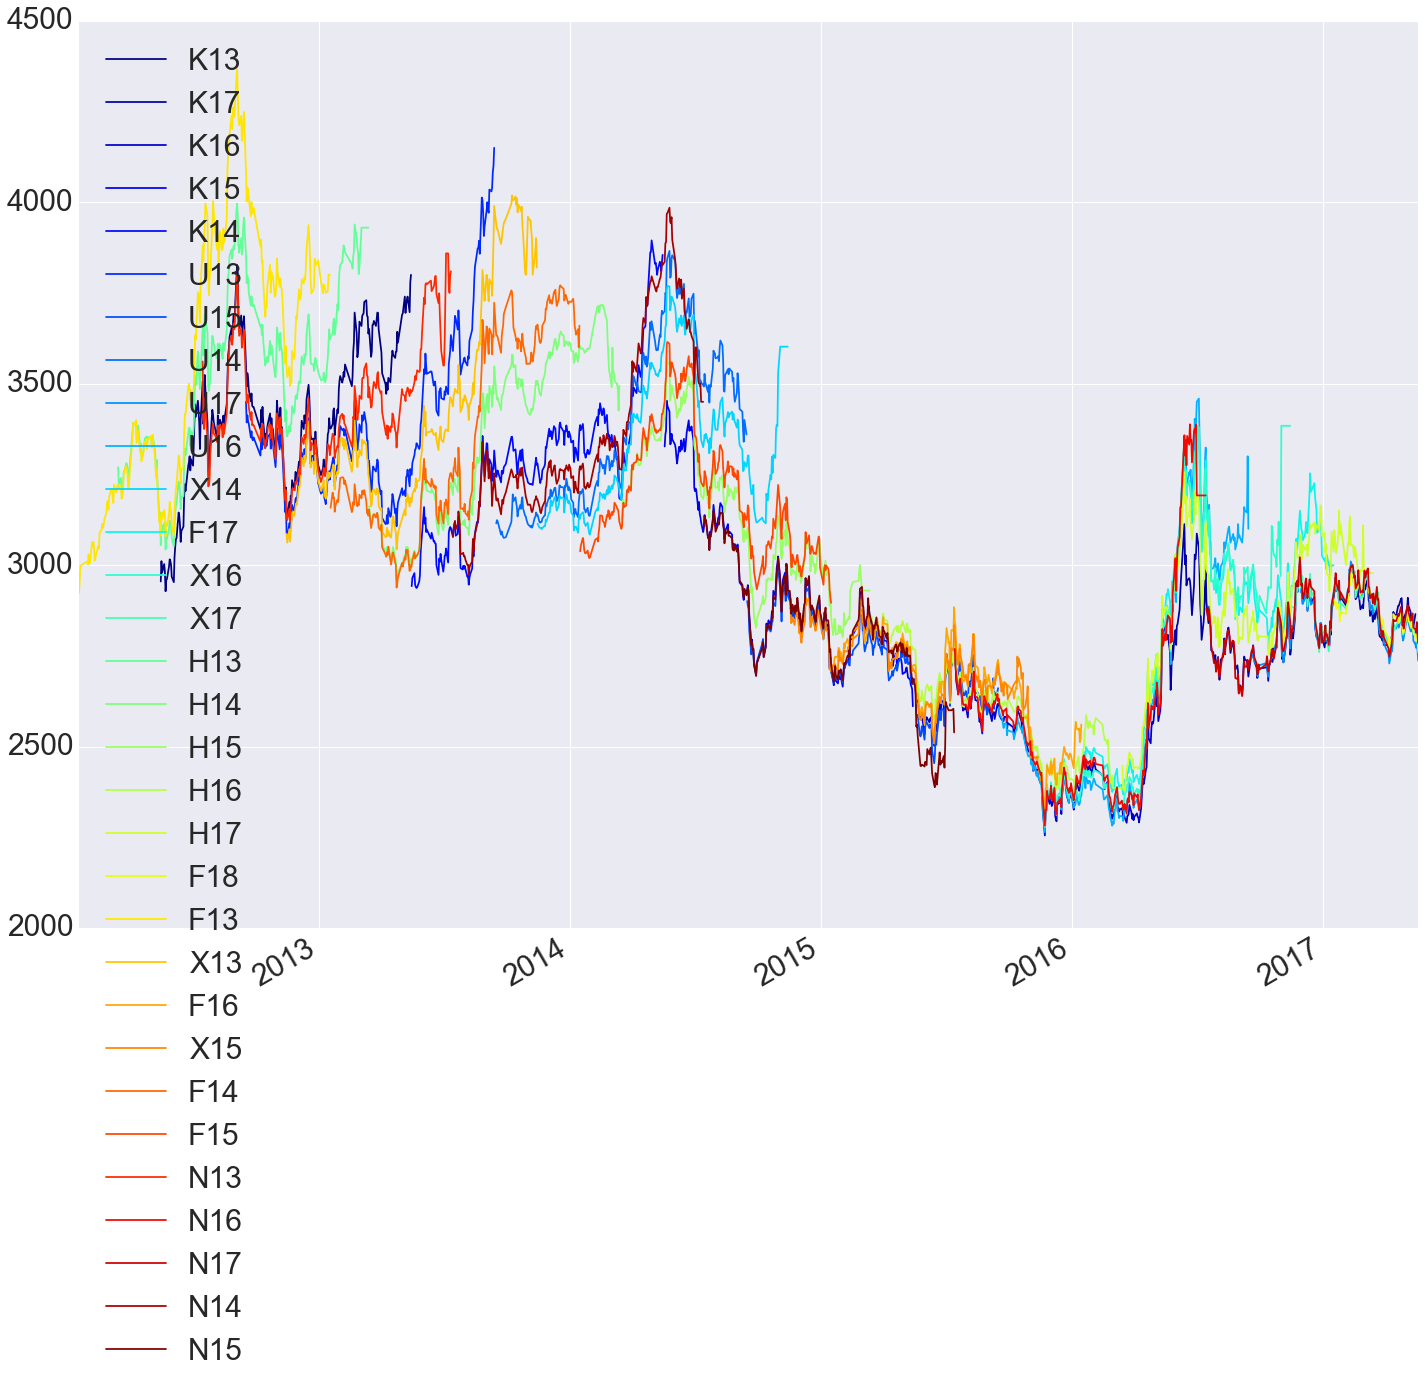

In [7]:
price.plot(colormap='jet')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


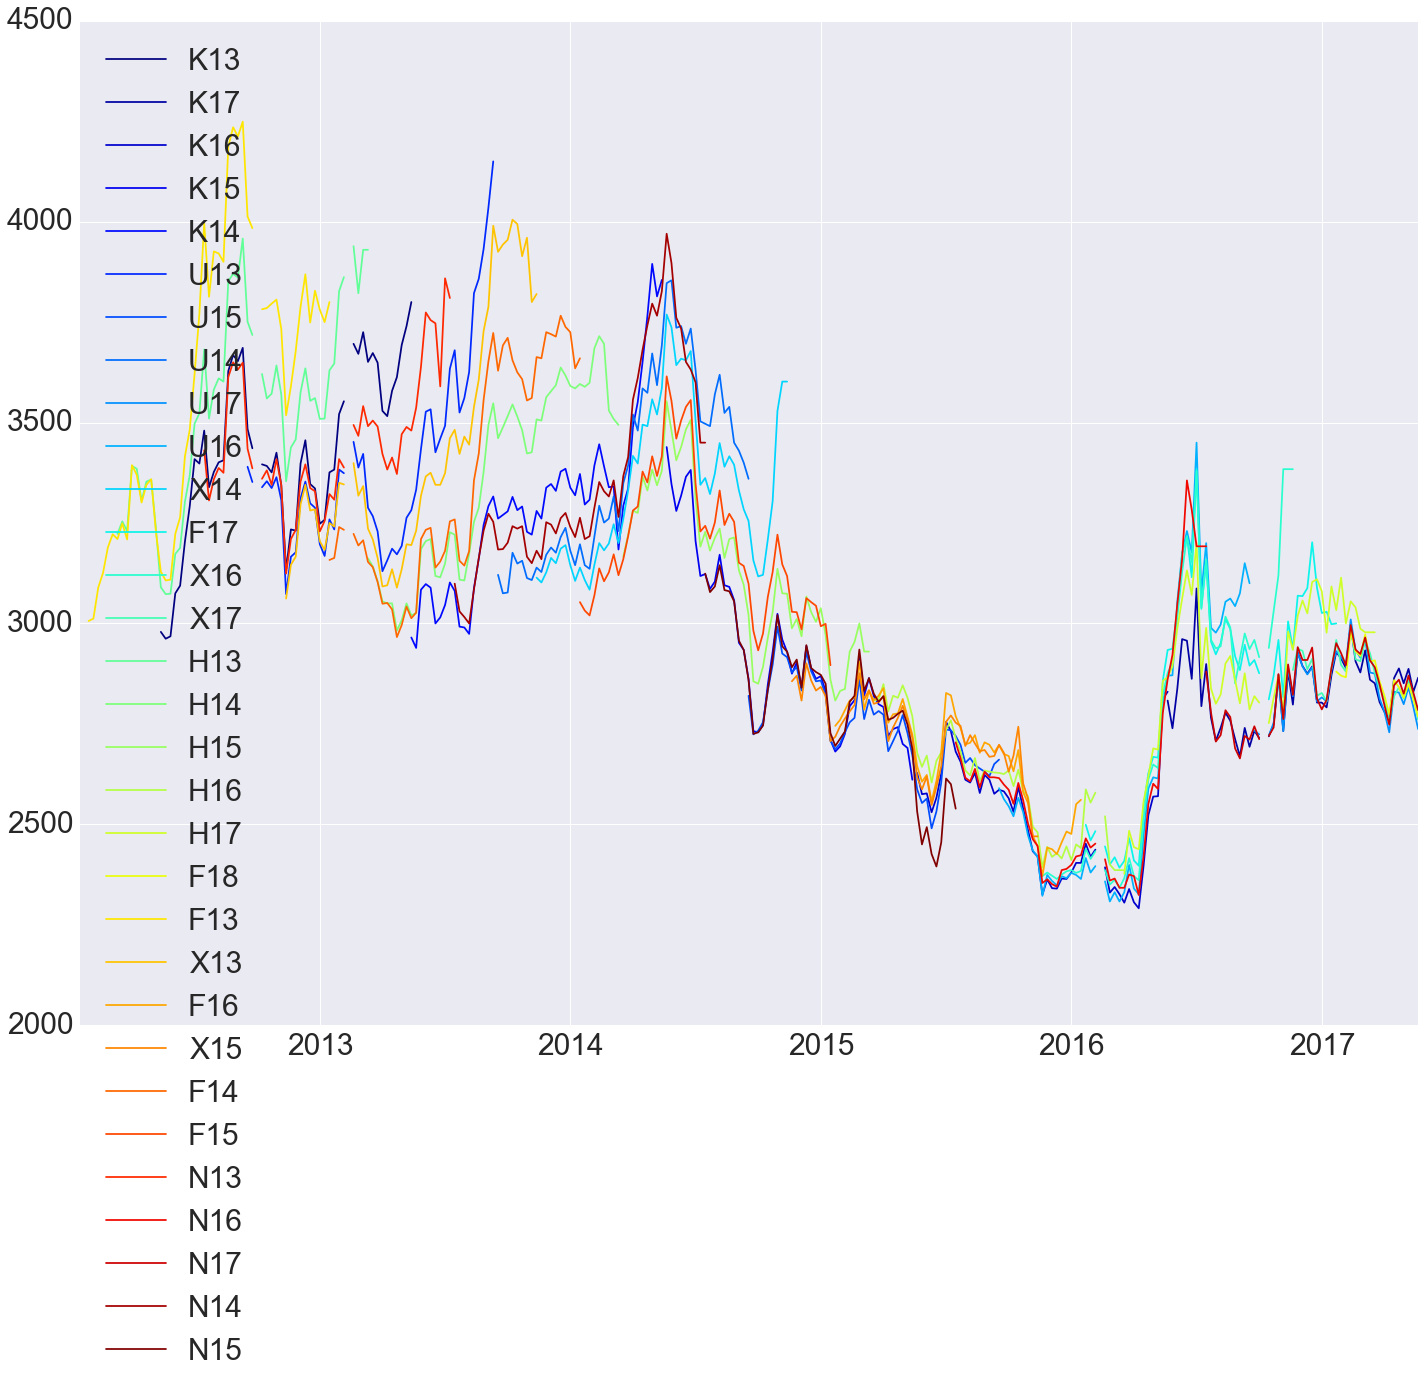

In [30]:
price.resample(rule='w3',how='last').plot(colormap='jet')

In [16]:
ix = pd.DatetimeIndex(start=datetime(2000, 1, 1), end=datetime(2018, 12, 31), freq='D')
volume=pd.DataFrame(index=ix)
for k in ddf.keys():
    volume[k]=ddf[k]['Open Interest']
volume=volume.dropna(how='all')

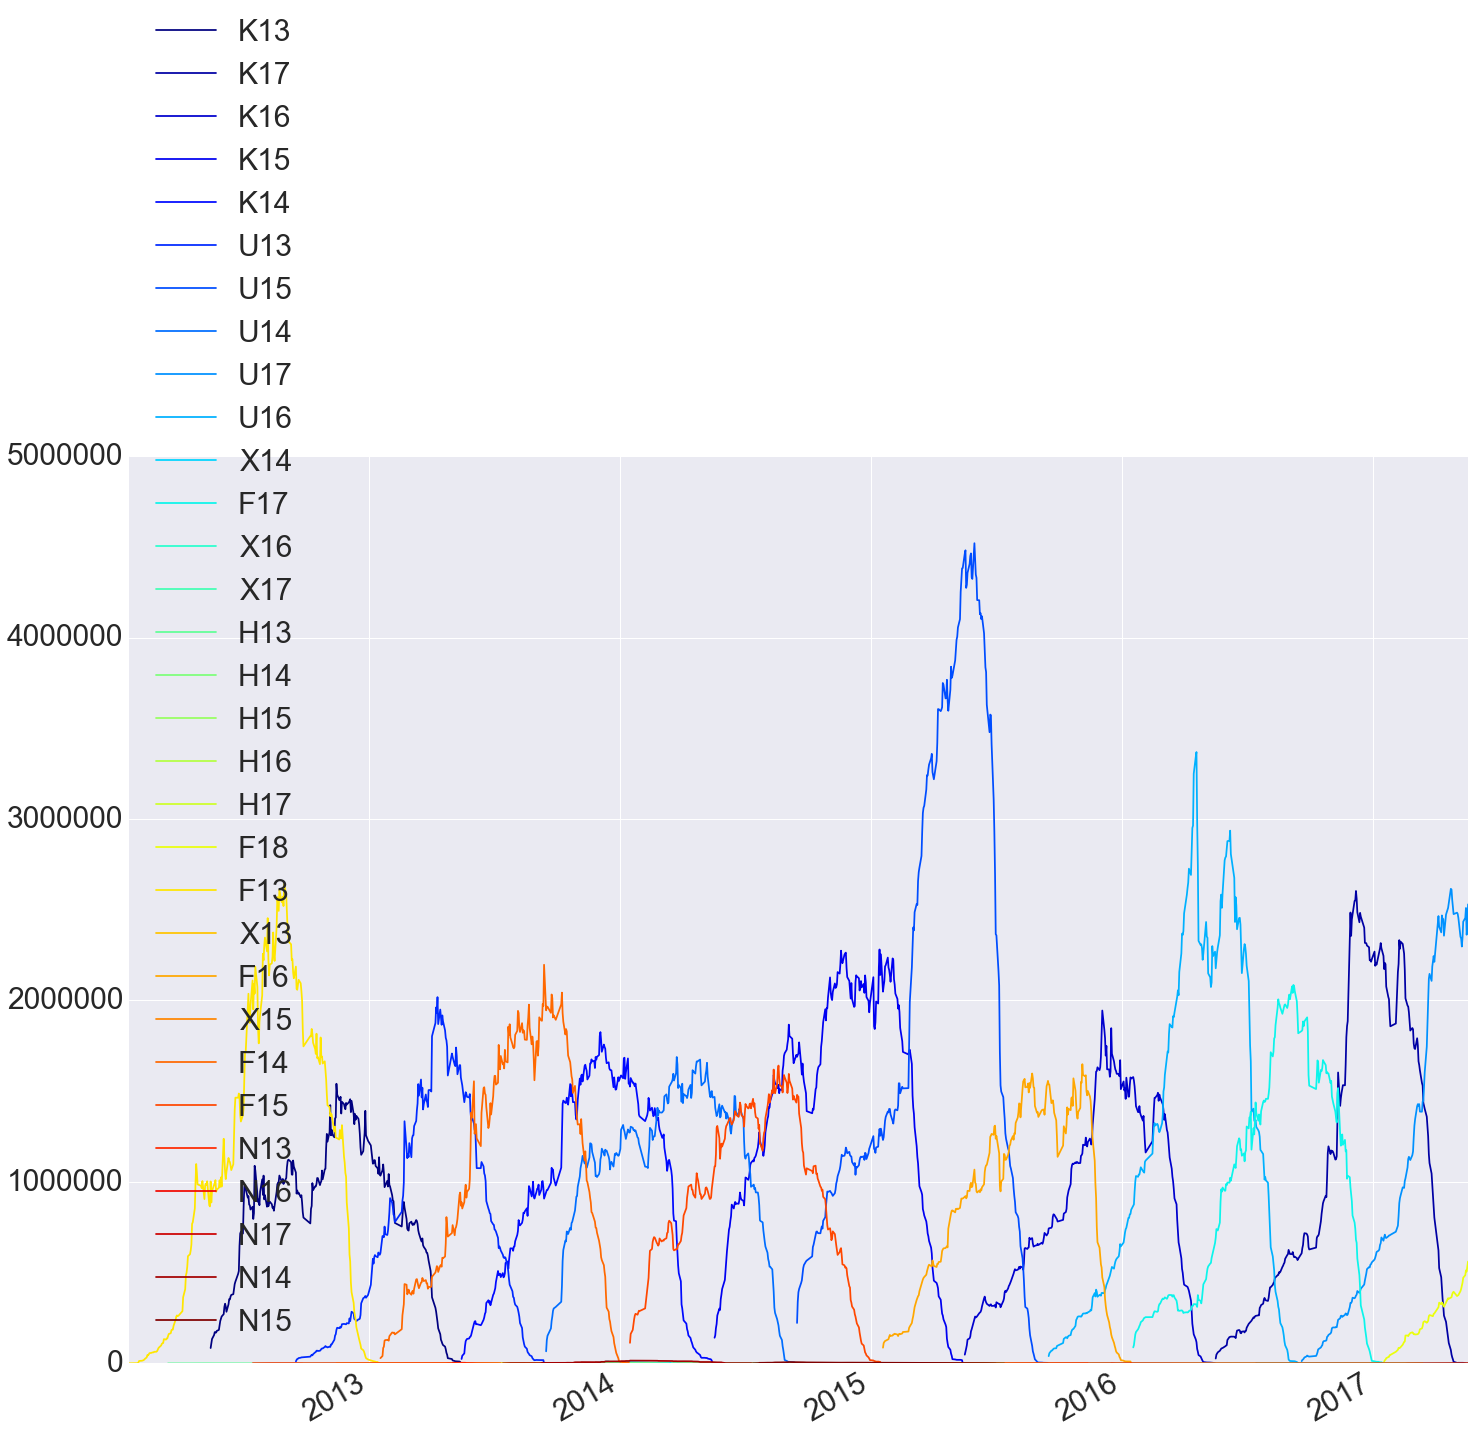

In [17]:
volume.plot(colormap='jet')

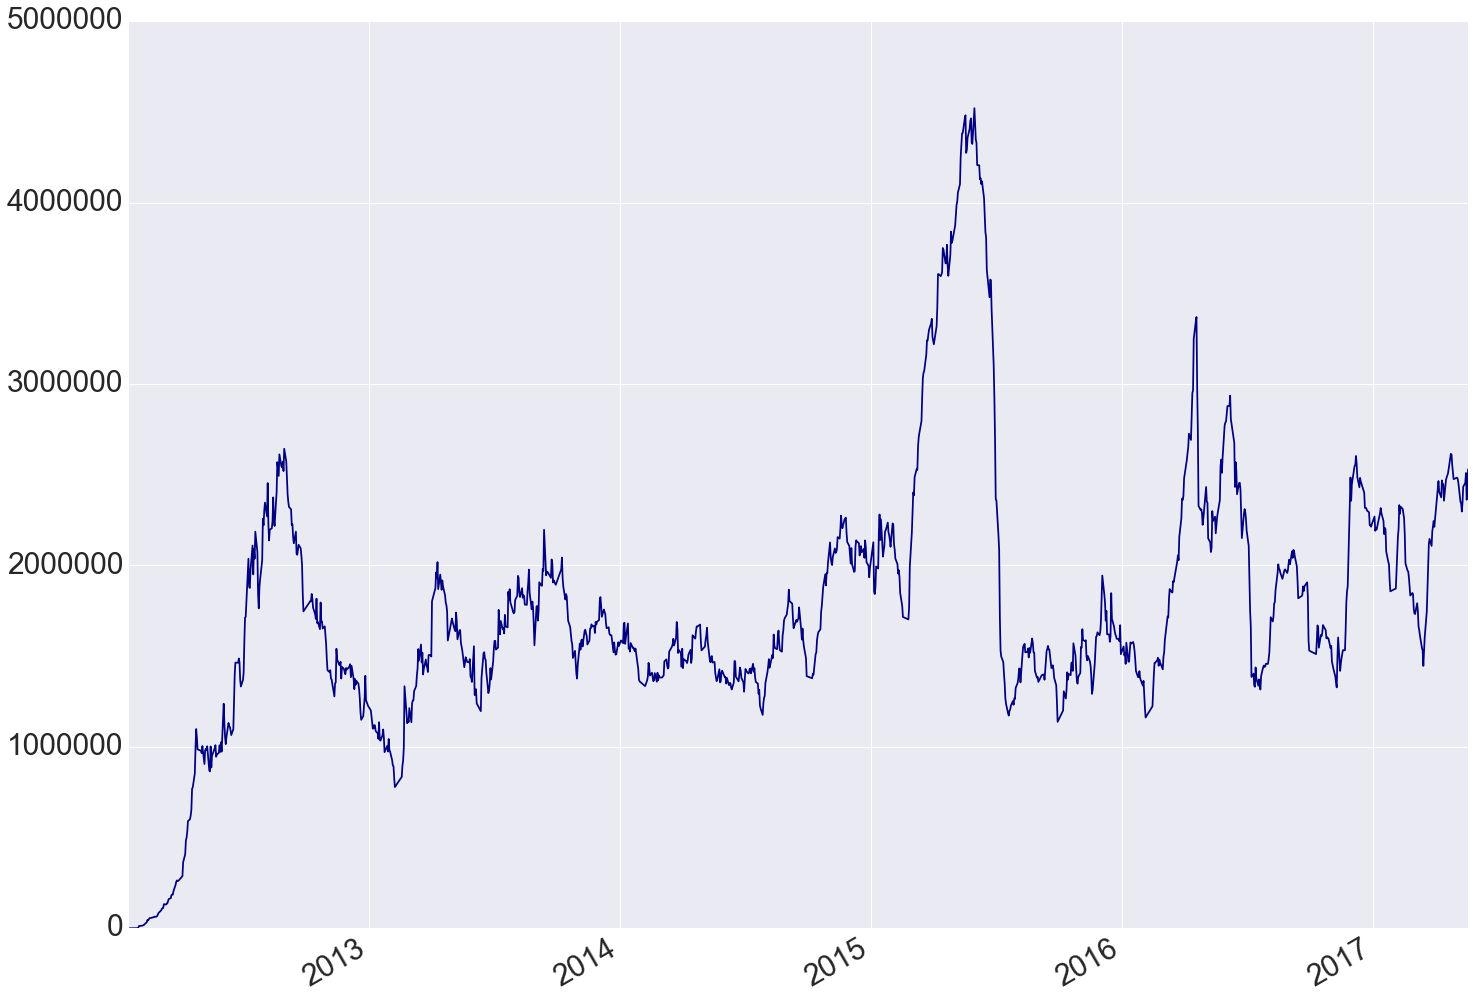

In [18]:
volume.max(axis=1).plot(colormap='jet')

# Stiching process
Uses open interest as the measure to switch.  

* Need to understand what to do with spreads

In [19]:

ww=volume.apply(lambda s: s.nlargest(2).index.tolist(), axis=1)
s=ww.copy()
mon='XXX'
spread=0
for ind, val in ww.iteritems():
    if val[0]==mon:
        s.ix[ind]=price[val[0]].ix[ind]
    else:
        print ind, val,spread
        s.ix[ind]=price[val[0]].ix[ind]+spread
    mon=val[0]
    if len(val)==2:
        spread=price[val[0]].ix[ind]-price[val[1]].ix[ind]
    

2012-01-18 00:00:00 ['F13'] 0
2012-11-06 00:00:00 ['K13', 'F13'] 394.0
2012-11-07 00:00:00 ['F13', 'K13'] -356.0
2012-11-13 00:00:00 ['K13', 'F13'] 372.0
2013-02-08 00:00:00 ['U13', 'K13'] 162.0
2013-05-30 00:00:00 ['F14', 'U13'] 233.0
2013-05-31 00:00:00 ['U13', 'F14'] -208.0
2013-06-03 00:00:00 ['F14', 'U13'] 224.0
2013-06-04 00:00:00 ['U13', 'F14'] -247.0
2013-06-05 00:00:00 ['F14', 'U13'] 291.0
2013-10-31 00:00:00 ['K14', 'F14'] 312.0
2014-02-24 00:00:00 ['U14', 'K14'] 140.0
2014-06-09 00:00:00 ['F15', 'U14'] 276.0
2014-06-16 00:00:00 ['U14', 'F15'] -235.0
2014-06-25 00:00:00 ['F15', 'U14'] 136.0
2014-06-27 00:00:00 ['U14', 'F15'] -145.0
2014-06-30 00:00:00 ['F15', 'U14'] 178.0
2014-07-24 00:00:00 ['K15', 'F15'] 111.0
2014-07-29 00:00:00 ['F15', 'K15'] -144.0
2014-08-14 00:00:00 ['K15', 'F15'] 136.0
2014-08-18 00:00:00 ['F15', 'K15'] -150.0
2014-08-26 00:00:00 ['K15', 'F15'] 187.0
2015-02-26 00:00:00 ['U15', 'K15'] 54.0
2015-07-22 00:00:00 ['F16', 'U15'] -50.0
2015-11-20 00:00:00 [

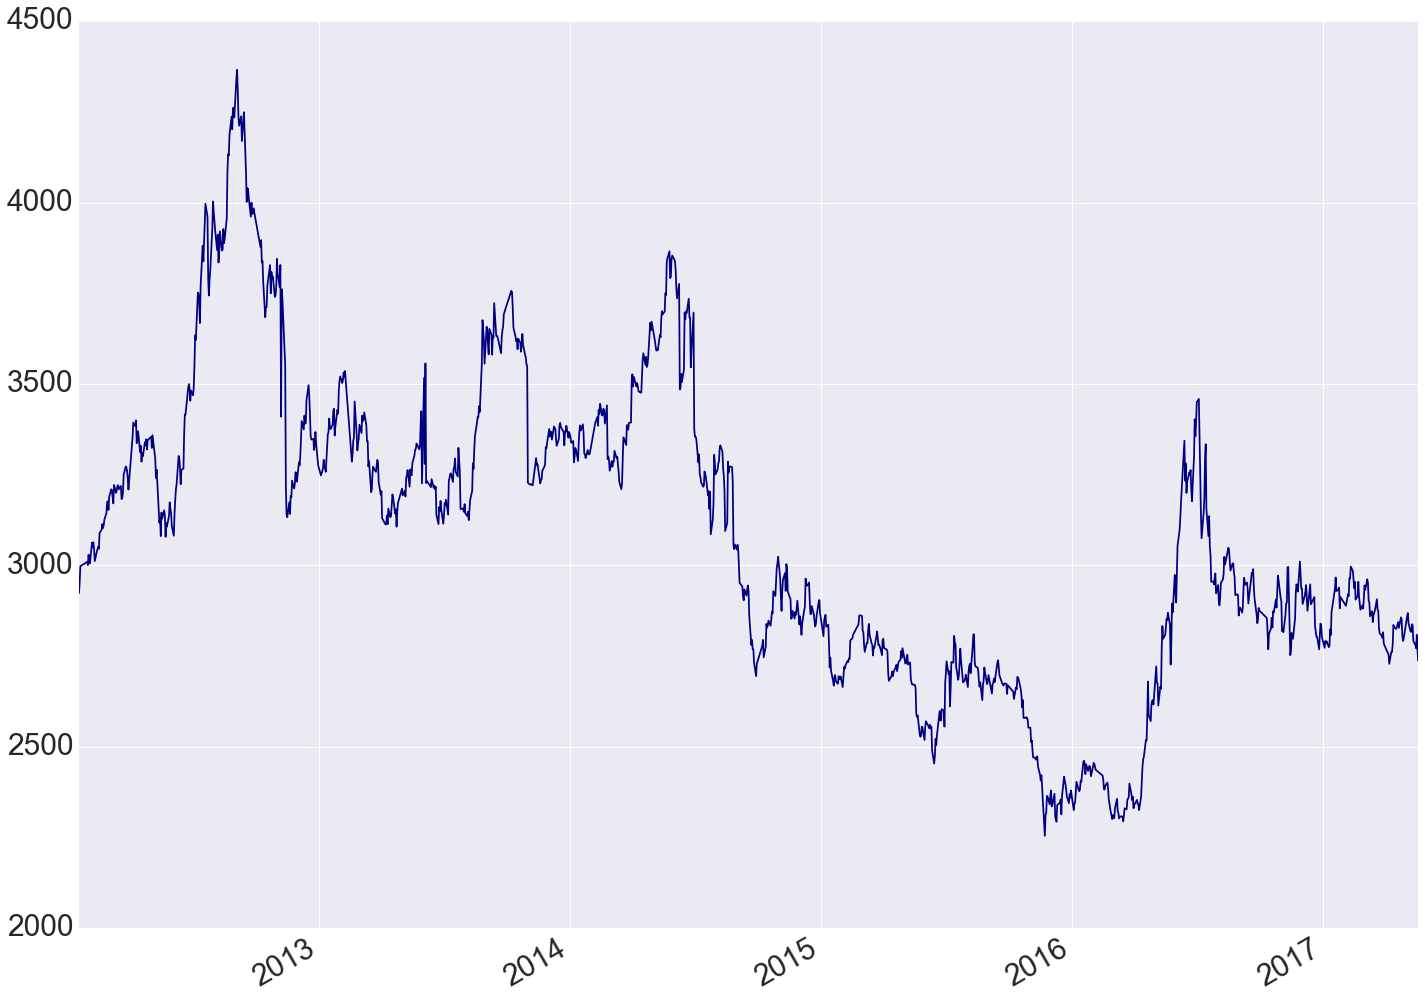

In [22]:
s.plot(colormap='jet')

In [93]:
def compare(last,this):
    if this[1:]>last[1:] or this[0] > last[0]:
        return this
    else:
        return last

In [2]:
def adjusted_returns(price,volume):
    rtn=price.pct_change()
    ww=volume.apply(lambda s: s.nlargest(2).index.tolist(), axis=1)
    s=ww.copy()
    mon='A00'
    spread=0
    for ind, val in ww.iteritems():
        mon=compare(mon,val[0])
        s.ix[ind]=rtn[val[0]].ix[ind]
    return s

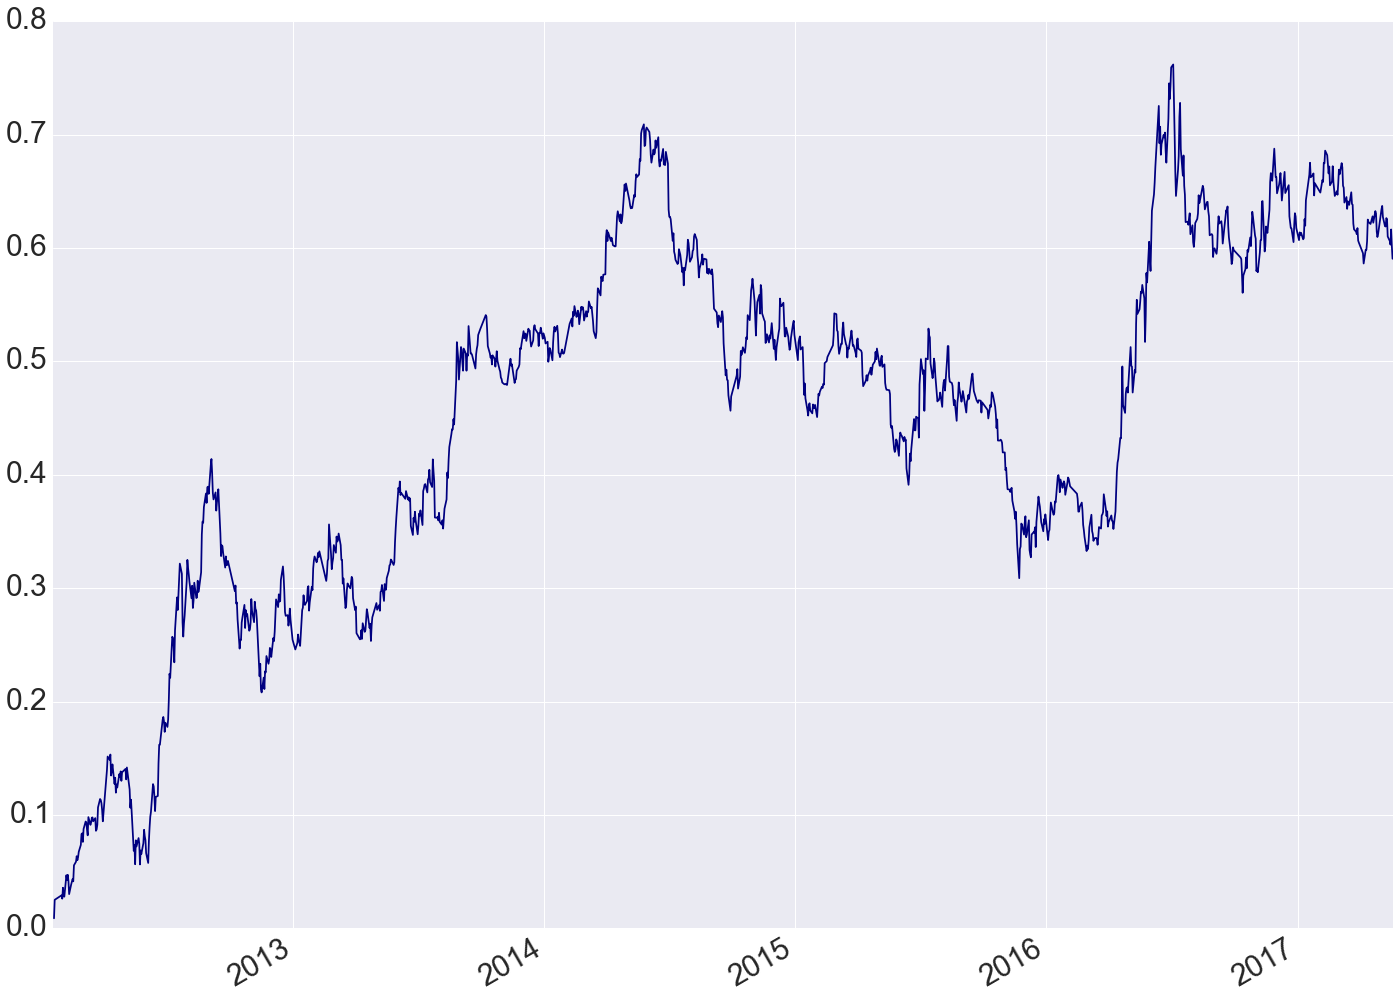

In [102]:
adjusted_returns(price,volume).cumsum().plot(colormap='jet')